# Problem Sheet 1


In this problem sheet, you are expected to 
- Import the datas from either online/local data source;
- Perform exploratory data analysis, data imputation;
- Divide data into train set and test set;
- Experience how model fitting, model evaluation works (without going into the "blackbox")

### Question 1 : Data Importation 

1. Import the S&P500 stocks price datas (all_stocks_5yr.csv) as pandas Dataframe into your notebook, from the source Dataset: https://www.kaggle.com/camnugent/sandp500, name this data frame as "sp500".

In [1]:
import pandas as pd
sp500 = pd.read_csv('./all_stocks_5yr.csv')

### Question 2 : First Exploration


2. What is the shape of your data? (how many rows and columns?)

In [2]:
# Method 1
sp500.shape

(619040, 7)

In [3]:
# Method 2
sp500.info

<bound method DataFrame.info of               date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]>

3. Are there missing values in the data? What is missing?

In [4]:
# It can be used to determine whether there are missing values for each attribute
sp500.isna().any()

date      False
open       True
high       True
low        True
close     False
volume    False
Name      False
dtype: bool

In [5]:
# Find the place where the missing values exactly are
# 'NaN' are the missing values
sp500[sp500.isna().any(axis=1)]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


4. What are the components of S&P500 index? (You can find them in the column "name"). Which stands for Apple ?

In [6]:
set(sp500.Name)  # 'AAPL' stands for Apple

{'A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADS',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFL',
 'AGN',
 'AIG',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'ALXN',
 'AMAT',
 'AMD',
 'AME',
 'AMG',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APC',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ARNC',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AYI',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBT',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BHF',
 'BHGE',
 'BIIB',
 'BK',
 'BLK',
 'BLL',
 'BMY',
 'BRK.B',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CA',
 'CAG',
 'CAH',
 'CAT',
 'CB',
 'CBG',
 'CBOE',
 'CBS',
 'CCI',
 'CCL',
 'CDNS',
 'CELG',
 'CERN',
 'CF',
 'CFG',
 'CHD',
 'CHK',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COL',
 'COO',
 'COP',
 'COST',
 'COTY',
 'CPB',
 'CRM',
 'CSCO',
 'CSRA',
 'CSX',

5. What is the starting date and last date of this sp500? 

In [7]:
sp500['date'].sort_values()

0         2013-02-08
508224    2013-02-08
506965    2013-02-08
85755     2013-02-08
505706    2013-02-08
             ...    
147509    2018-02-07
31474     2018-02-07
241494    2018-02-07
42609     2018-02-07
619039    2018-02-07
Name: date, Length: 619040, dtype: object

In [8]:
# The starting date: 2013-02-08
# The last date: 2018-02-07

6.  Plot a line chart showing Apple stock prices from 2014-01-01 to 2016-12-31, including open/high/low/closed/settle prices, in the same chart. 

In [9]:
# df=sp500[sp500['Name'] == 'AAPL'].reset_index(drop=True)
# df
# df[df['date'].isin(['2014-01-02'])]   # 226
# df.iloc[[225]]

In [8]:
Apple = sp500[sp500['Name'] == 'AAPL'].set_index('date').loc['2014':'2017'].reset_index()
Apple

,date,open,high,low,close,volume,Name
0,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,AAPL
1,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870,AAPL
2,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151,AAPL
3,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766,AAPL
4,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685,AAPL
...,...,...,...,...,...,...,...
751,2016-12-23,115.5900,116.5200,115.5900,116.5200,14249484,AAPL
752,2016-12-27,116.5200,117.8000,116.4900,117.2600,18296855,AAPL
753,2016-12-28,117.5200,118.0166,116.2000,116.7600,20905892,AAPL
754,2016-12-29,116.4500,117.1095,116.4000,116.7300,15039519,AAPL


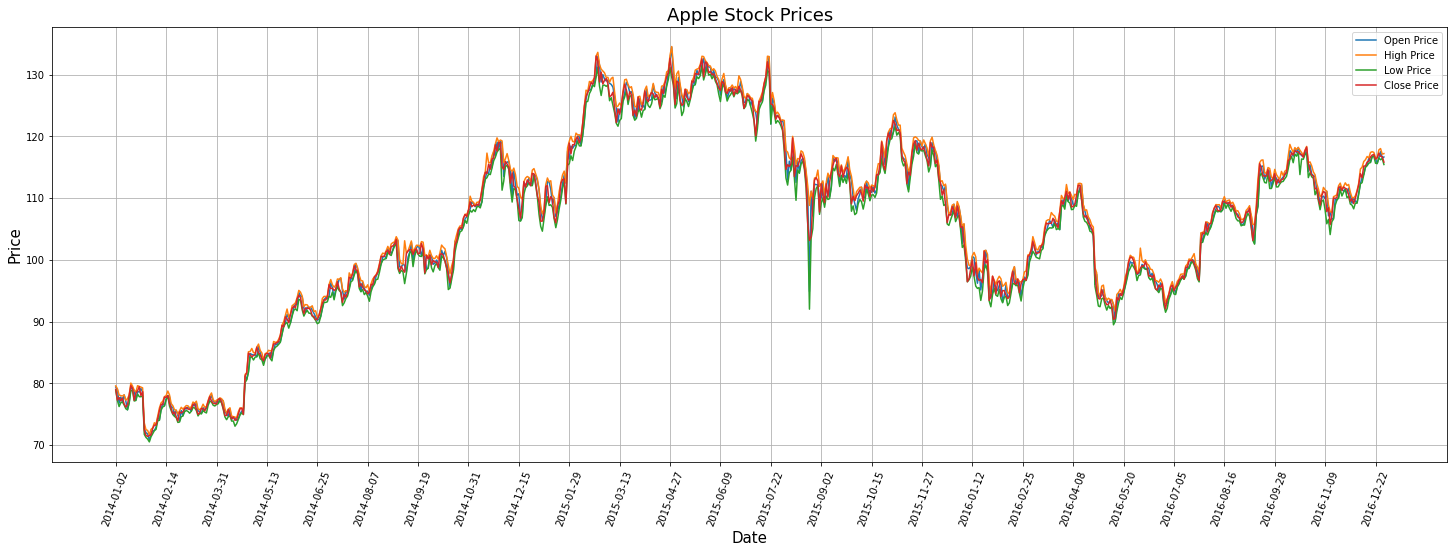

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 8))
plt.plot('date', 'open', data=Apple, label='Open Price')
plt.plot('date', 'high', data=Apple, label='High Price')
plt.plot('date', 'low', data=Apple, label='Low Price')
plt.plot('date', 'close', data=Apple, label='Close Price')
plt.xticks(np.arange(0, 757, 30), rotation=70)
plt.yticks()
plt.title('Apple Stock Prices', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.grid()
plt.show()

7. which are the top 5 stocks that have highest positive/negative correlation with Apple?

In [14]:
sp500_c = pd.DataFrame()

In [19]:
for i in set(sp500.Name):
    sp500_c[i] = sp500[sp500['Name']==i].reset_index().close

In [20]:
sp500_c

,AFL,NI,LNT,L,VFC,COTY,XLNX,DAL,LKQ,HD,...,MAA,UNH,HAS,KEY,MKC,DLTR,AVY,GILD,AET,FITB
0,50.35,26.92,23.190,43.85,36.4357,17.36,37.51,14.62,23.73,67.01,...,66.48,57.74,39.84,9.57,63.63,41.06,39.25,40.90,50.60,16.61
1,50.26,26.94,23.255,43.51,36.2119,17.52,37.46,14.69,23.31,66.38,...,67.26,57.12,39.69,9.48,63.94,40.96,39.21,40.40,50.38,16.50
2,49.50,27.03,23.320,43.65,36.3524,17.39,37.58,14.50,23.20,67.32,...,67.40,57.01,39.89,9.53,64.09,40.23,39.43,40.83,50.15,16.56
3,48.65,27.18,23.305,44.08,36.2667,17.30,37.80,14.78,23.26,67.45,...,67.41,57.23,40.42,9.45,64.09,39.72,39.61,41.40,49.51,16.11
4,48.83,26.91,23.500,44.08,36.3833,17.19,38.44,14.24,23.08,67.34,...,67.56,57.05,40.88,9.48,64.39,39.93,39.69,41.60,49.56,16.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,89.69,24.24,39.080,51.59,80.6200,NaN,72.49,56.42,41.79,199.90,...,91.75,235.22,95.74,21.93,107.52,113.87,120.36,83.49,187.39,33.66
1255,88.95,23.97,38.910,50.82,79.8900,NaN,70.64,54.62,40.93,193.97,...,91.69,231.88,94.12,21.76,103.56,108.83,117.63,81.73,185.00,33.13
1256,86.21,23.52,38.220,48.19,78.6300,NaN,66.97,52.52,39.46,183.11,...,88.90,220.02,91.33,20.61,101.53,105.24,113.81,78.37,180.95,31.70
1257,85.62,23.28,37.510,47.81,79.3600,NaN,68.99,53.10,40.53,191.04,...,89.19,225.18,93.93,21.01,102.46,107.85,114.24,80.38,182.01,32.02


In [22]:
corr = sp500_c.corr(method='pearson', min_periods=1)
corr

,AFL,NI,LNT,L,VFC,COTY,XLNX,DAL,LKQ,HD,...,MAA,UNH,HAS,KEY,MKC,DLTR,AVY,GILD,AET,FITB
AFL,1.000000,-0.287199,0.844489,0.557628,0.294558,-0.153693,0.909678,0.604655,0.874334,0.834868,...,0.728144,0.892591,0.794623,0.796964,0.765578,0.734743,0.922956,-0.089499,0.858772,0.832889
NI,-0.287199,1.000000,-0.341639,0.076134,0.205914,0.022865,-0.319095,-0.214628,-0.390603,-0.466013,...,-0.540824,-0.402282,-0.510745,-0.133686,-0.586351,-0.337601,-0.451499,0.216544,-0.378541,-0.183817
LNT,0.844489,-0.341639,1.000000,0.252121,0.306140,0.118266,0.797147,0.731794,0.691181,0.905352,...,0.930462,0.927238,0.889181,0.673897,0.913236,0.811323,0.906715,0.021570,0.891835,0.646821
L,0.557628,0.076134,0.252121,1.000000,-0.291470,-0.785093,0.597953,-0.087002,0.412281,0.183108,...,0.076414,0.316277,0.152648,0.564513,0.122045,0.033795,0.358542,-0.621258,0.215180,0.674267
VFC,0.294558,0.205914,0.306140,-0.291470,1.000000,0.736088,0.157533,0.690566,0.326900,0.419309,...,0.193860,0.383391,0.291835,0.335260,0.181934,0.544917,0.327446,0.818739,0.484502,0.238291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DLTR,0.734743,-0.337601,0.811323,0.033795,0.544917,0.493871,0.604469,0.733707,0.725036,0.893994,...,0.770812,0.853268,0.768756,0.559197,0.825606,1.000000,0.833149,0.279772,0.869813,0.513425
AVY,0.922956,-0.451499,0.906715,0.358542,0.327446,0.102059,0.886541,0.705615,0.819197,0.953763,...,0.860521,0.970279,0.889677,0.757681,0.886644,0.833149,1.000000,-0.020305,0.952957,0.773295
GILD,-0.089499,0.216544,0.021570,-0.621258,0.818739,0.804271,-0.195607,0.532942,0.017924,0.141223,...,0.014555,0.068868,0.099472,0.034784,-0.036181,0.279772,-0.020305,1.000000,0.189985,-0.106863
AET,0.858772,-0.378541,0.891835,0.215180,0.484502,0.312450,0.821741,0.827753,0.746732,0.969009,...,0.847507,0.983523,0.919135,0.797431,0.853815,0.869813,0.952957,0.189985,1.000000,0.748674


In [36]:
apple_corr=corr.AAPL.sort_values(ascending=False)
apple_corr

AAPL     1.000000
ANTM     0.968687
MAR      0.964170
MCO      0.957373
HPQ      0.957253
           ...   
EVHC    -0.789508
DISCA   -0.794608
RRC     -0.810863
UA      -0.856929
MAT     -0.931754
Name: AAPL, Length: 505, dtype: float64

In [38]:
apple_corr.head(6)

AAPL    1.000000
ANTM    0.968687
MAR     0.964170
MCO     0.957373
HPQ     0.957253
ALL     0.950665
Name: AAPL, dtype: float64

In [ ]:
# 5 stocks that have highest positive/negative correlation with Apple:
# ANTM, MAR, MCO, HPQ, ALL

### Question 3 : Data Preparation



8. Deal with the missing data, if there are any of them.

In [13]:
sp500.dropna()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


9. Extract the data of Apple, name them as "apple"

In [23]:
apple = sp500[sp500['Name'] == 'AAPL']
apple

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


10. Prepare data for training. Let's use last 7 days' price to predict the price in the next day.

In [107]:
print(1259 // 7)
print(1259 % 7)

179
6


In [91]:
apple_cl = list(apple.close)
X = np.array([])
y = np.array([])
for i in range(1257):
    if i > 0 and i % 7 == 0:
        y = np.append(y, apple_cl[i])
    else:
        X = np.append(X, apple_cl[i])

In [69]:
1078 / 7

154.0

In [92]:
X = X.reshape(154, 7)
X

array([[ 67.8542,  68.5614,  66.8428, ...,  66.6556,  65.7371,  65.7128],
       [ 63.7228,  64.4014,  63.2571, ...,  63.5099,  63.0571,  60.0071],
       [ 61.5919,  60.8088,  61.5117, ...,  62.5528,  61.1928,  61.7857],
       ...,
       [172.26  , 172.23  , 173.03  , ..., 174.35  , 174.33  , 175.28  ],
       [177.09  , 176.19  , 179.1   , ..., 178.46  , 177.04  , 174.22  ],
       [171.11  , 171.51  , 167.96  , ..., 167.78  , 160.5   , 156.49  ]])

In [112]:
y

array([ 64.1214,  61.4957,  61.2042,  64.6756,  61.3988,  62.0471,
        56.9528,  62.7557,  64.7099,  62.8085,  64.2478,  62.5142,
        59.5482,  58.4599,  61.0411,  60.9014,  64.6471,  64.9214,
        71.5814,  70.2428,  70.6628,  67.4714,  68.1071,  69.5125,
        72.6985,  73.8111,  73.2131,  74.0898,  77.9942,  80.9185,
        78.6813,  79.2171,  76.6455,  78.4385,  71.3974,  75.5699,
        75.8785,  75.3942,  76.6585,  76.1242,  77.3785,  74.7828,
        75.9569,  84.4971,  84.6899,  86.6156,  89.8071,  93.86  ,
        90.91  ,  93.52  ,  95.22  ,  94.72  ,  95.6   ,  95.99  ,
       100.57  , 102.5   , 101.    , 100.96  , 100.75  , 101.02  ,
        99.76  , 107.34  , 109.01  , 115.47  , 118.93  , 114.12  ,
       112.65  , 112.52  , 112.01  , 109.55  , 117.16  , 122.02  ,
       129.495 , 129.36  , 124.45  , 127.21  , 124.25  , 126.85  ,
       128.62  , 128.95  , 125.865 , 131.39  , 129.96  , 128.59  ,
       127.61  , 126.6   , 125.66  , 125.22  , 121.3   , 113.4

11. Divide the datas into train_set and test set. Remember we are dealing with time series data. Refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) for details.

In [113]:
from sklearn.model_selection import TimeSeriesSplit
from collections import deque

tscv = TimeSeriesSplit()

def get_last_cv(splits):
    splits_deque = deque(splits, maxlen=1)
    last_element = splits_deque.pop()
    train, test = last_element
    return train, test

train_index, test_index = get_last_cv(tscv.split(X))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

### Question 4 : Prediction, and Evaluation 




12. Using the Linear Regression Model to predict the closed price of apple by its price in the last 7 days. Report the  mean squared error.

In [114]:
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)
y_pred = linear_r.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

378.009656987511